# 1. 지하철 유무임 승차비율 데이터 분석 (50점)

In [1]:
import csv
import numpy as np
import matplotlib.pyplot as plt

data = []
with open('Metro_fare.csv', 'r', encoding='cp949') as f:
    source = csv.reader(f, delimiter=',')
    print(source)
    header = next(source)
    for row in source:
        data.append(row)

## - (1) 총 승차인원(유임승차 + 무임승차)과 총 하차인원(유임하차 + 무임하차)이 가장 많은 역과 승차인원을 출력하세요. (25점) 

In [2]:
data_np = np.array(data, dtype = object) # 리스트 형태의 데이터를 배열로 변환

In [3]:
def change_int(x): # 숫자로 변환
    x = int(x.replace(',',''))
    return x

In [4]:
max_on = 0
max_down = 0

for i in range(len(data_np)):
    
    for j in range(4, 8):
        if isinstance(data_np[i][j], str):
            data_np[i][j] = change_int(data_np[i][j])
            

    on = data_np[i][4] + data_np[i][6]
    if on > max_on:
        max_on = on
        index_on = i

        
    down = data_np[i][5] + data_np[i][7]
    if down > max_down:
        max_down = down
        index_down = i
        

print(f"최대 승차: {data_np[index_on][3]}역 {max_on}")
print(f"최대 하차: {data_np[index_down][3]}역 {max_down}")

최대 승차: 강남역 2209994
최대 하차: 강남역 2175932


## 1-(2) 유임승차자 비율(유임승차자/총 승차인원)이 높은 상위 10개의 역과 그 비율을 구하시오.

In [5]:
ratio = []

for i in range(len(data_np)):
    data_np[i][9] = change_int(data_np[i][9])

    a = data_np[i][4] / (data_np[i][4] + data_np[i][6])
    ratio.append(a)

data_upd = np.column_stack((data_np, ratio))
sorted_array = data_upd[np.argsort(data_upd[:, -1])[::-1]]

for i in range(10):
    print(f"{i+1}. {sorted_array[i][3]}역 {sorted_array[i][10]:.5f}")

1. 한양대역 0.95570
2. 홍대입구역 0.94716
3. 홍대입구역 0.94658
4. 서울역역 0.94036
5. 마곡나루(서울식물원)역 0.94005
6. 신논현역 0.93840
7. 여의도역 0.93735
8. 한강진역 0.93722
9. 디지털미디어시티역 0.93384
10. 청라국제도시역 0.93327


# 2. 지하철 시간대별 승하차 데이터 분석 (50점)

In [6]:
import csv
data = []
with open('Metro_time.csv', 'r', encoding='cp949') as f:
    source = csv.reader(f, delimiter=',')
    header = next(source)
    header2 = next(source)
    for row in source:
        data.append(row)

## (1) 출근 시간대(7시~9시) 승차인원과 하차인원 각각에 대해 정렬된 barplot을 그리고, 인원이 가장 많은 역과 인원을 각각 찾으세요. (25점)

In [8]:
data_np = np.array(data, dtype = object) # 리스트 형태의 데이터를 배열로 변환

<BarContainer object of 615 artists>

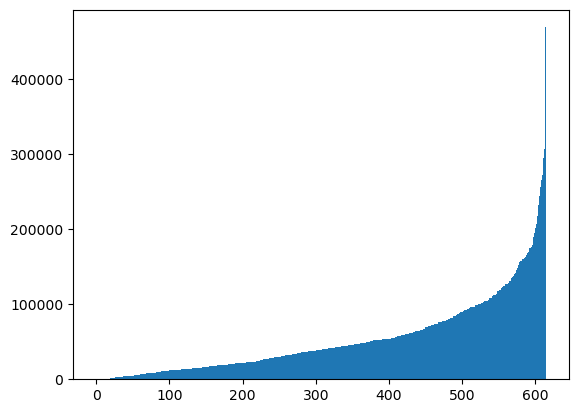

In [9]:
work_on = []
work_down = []
max_1 = 0
max_2 = 0
for i in range(len(data_np)):
    for j in range(4,52):
        if isinstance(data_np[i][j], str):
            data_np[i][j] = change_int(data_np[i][j])
            
    sum_on = data_np[i][10] + data_np[i][12]
    work_on.append(sum_on)
    
    if sum_on > max_1:
        max_1 = sum_on
        index_1 = i


    sum_down = data_np[i][11] + data_np[i][13]
    work_down.append(sum_down)

    if sum_down > max_2:
        max_2 = sum_down
        index_2 = i

# 승차인원 그래프 그리기
on_np = np.array(work_on)
on_sort = on_np[np.argsort(on_np)]

plt.bar(range(len(on_sort)),on_sort, width=2)

In [10]:
# 승차인원이 가장 많은 역 출력
print(f"승차인원 가장 많은 역: {data_np[index_1][3]}역 {max_1}")

승차인원 가장 많은 역: 신림역 469127


<BarContainer object of 615 artists>

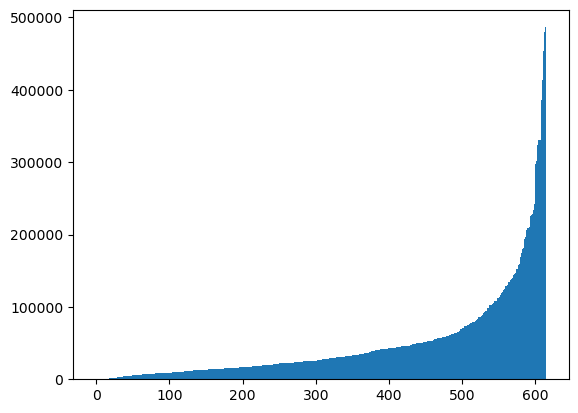

In [11]:
# 하차인원 그래프

down_np = np.array(work_down)
down_sort = down_np[np.argsort(down_np)]

plt.bar(range(len(down_sort)),down_sort, width=2)

In [12]:
# 하차인원이 가장 많은 역 출력
print(f"하차인원 가장 많은 역: {data_np[index_2][3]}역 {max_2}")

하차인원 가장 많은 역: 가산디지털단지역 486420


## (2) 각 시간대별 모든 지하철역에서의 총 승차인원의 합과 총 하차인원의 합을 구하고, x축을 시간, y축을 인원으로 하는 그래프로 나타내시오. (25점) 

In [13]:
for i in range(len(data_np)):
    for j in range(4,52):
        if isinstance(data_np[i][j], str):
            data_np[i][j] = change_int(data_np[i][j])       

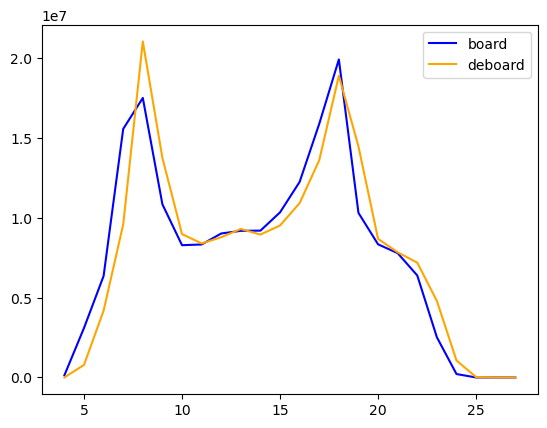

In [14]:
on_col = data_np[:,4:-1:2]
total_on = np.sum(on_col,axis=0)

down_col = data_np[:,5:-1:2]
total_down = np.sum(down_col,axis = 0)

# 그래프 그리기
time = np.arange(4,28)

plt.plot(time,total_on,'blue',label='board')
plt.plot(time,total_down,'orange',label = 'deboard')
plt.legend(loc = 'upper right')

plt.show()